# 03 – Naive Bayes Baseline Model

In this notebook:
- load preprocessed dataset
- convert text to TF–IDF features
- train a Naive Bayes classifier
- evaluate using accuracy, precision, recall, F1
- show confusion matrix

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

DATA_PATH = Path("../data/processed/cleaned.csv")
df = pd.read_csv(DATA_PATH)

# IMPORTANT: replace NaNs in clean_body with empty strings
df['clean_body'] = df['clean_body'].fillna('')

df.head()

,clean_body,label
0,buck up your troubles caused by small dimensio...,1
1,upgrade your sex and pleasures with these tech...,1
2,the daily top from cnncom top videos and stori...,1
3,would anyone object to removing so from this l...,0
4,welcomefastshippingcustomersupport,1


In [2]:
X = df['clean_body']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

len(X_train), len(X_test)

(31323, 7831)

In [3]:
vectorizer = TfidfVectorizer(
    max_features=10000,
    stop_words='english'
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [4]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [5]:
y_pred = nb.predict(X_test_vec)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3462
           1       1.00      0.95      0.98      4369

    accuracy                           0.97      7831
   macro avg       0.97      0.98      0.97      7831
weighted avg       0.97      0.97      0.97      7831



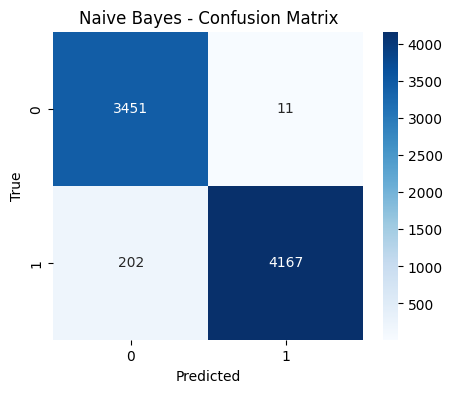

In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [7]:
import joblib
from pathlib import Path

models_path = Path("../models")
models_path.mkdir(exist_ok=True)

joblib.dump(nb, models_path / "naive_bayes.pkl")

['..\\models\\naive_bayes.pkl']

In [8]:
from io import StringIO
from pathlib import Path

report_str = classification_report(y_test, y_pred)

results_path = Path("../results")
results_path.mkdir(exist_ok=True)

with open(results_path / "nb_report.txt", "w", encoding="utf-8") as f:
    f.write(report_str)